In [40]:
# For this code to run please download the archive.zip file from here: https://www.kaggle.com/datasets/prasunroy/natural-images?resource=download
# It is also referenced in the CECS456_project.pdf , under the 1st entry labeled: "Natural Images with 8 classes".
# After downloading, upload the archive.zip file to your google drive.
# Import the drive module from Google Colab to access Google Drive files.
from google.colab import drive
# This mounts the drive to this .ipynb directory, which allows acces to files stored in your Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Now use the !unzip command to unzip the archive.zip file above.
# Usually the path to is called "My Drive". To check the path, look to the sidebar and under the 'Files' tab there should be a 'drive' folder. Inside that shows the correct name of the Google Drive path.
# -d is to extract the contents of archive.zip to whatever destination is preferred. /content is the default directory the .ipynb uses so any variant of /content/(destination name) can be used and will be referenced later.
!unzip '/content/drive/My Drive/archive.zip' -d '/content/dataset'

Archive:  /content/drive/My Drive/archive.zip
replace /content/dataset/data/natural_images/airplane/airplane_0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [45]:
# Import the os module to use the file system.
import os
# Define the base directory where the natural images from the acrhive.zip are located.
base_dir = '/content/dataset/natural_images'
# Make a category for the different classes of images, whcin should be: car, fruit, cat, motorbike, airplane, flower, dog, and person. For a total of 8 categories.
categories = os.listdir(base_dir)
# Print the names of each category.
print("Categories:", categories)

Categories: ['car', 'fruit', 'cat', 'motorbike', 'airplane', 'flower', 'dog', 'person']


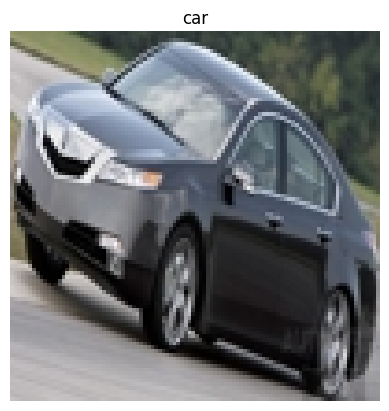

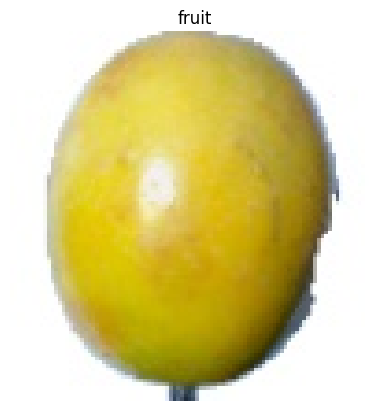

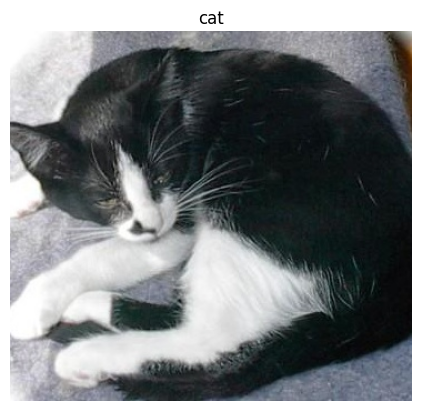

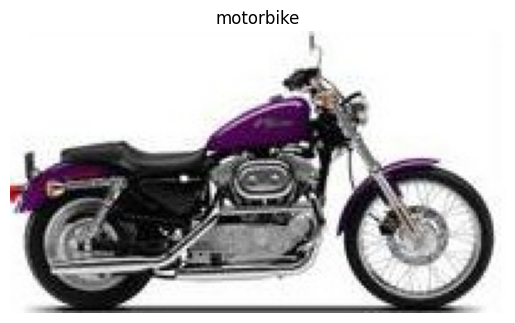

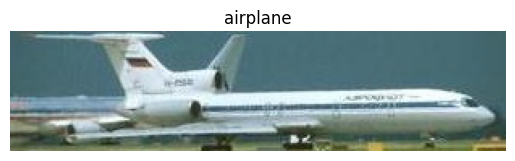

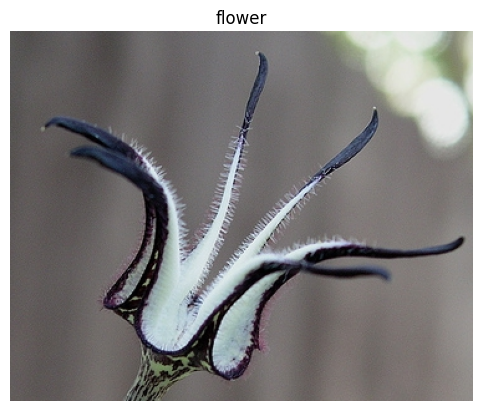

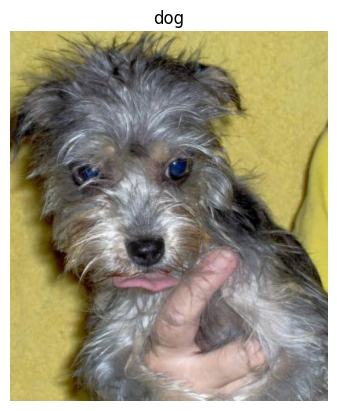

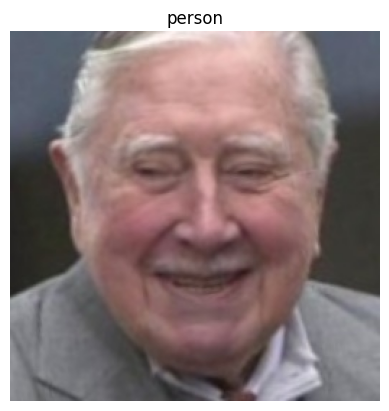

In [46]:
# Import the random module for use in randomly selecting images from the dataset for visual confirmation.
import random
# Import the image read function to read images from the data set.
from matplotlib.image import imread
# Import Matplotlib library to plot data from our model.
import matplotlib.pyplot as plt

# Loop through all categories in the data set for an example image of each.
for category in categories:
  # Get the path to the current catagory's folder.
  folder_path = os.path.join(base_dir, category)
  # Randomly select an image from the category folder.
  random_image = random.choice(os.listdir(folder_path))
  # Construct the path to the randomly selected image file.
  img_path = os.path.join(folder_path, random_image)
  # Read the image file
  img = imread(img_path)
  # Display the image using Matplotlib.
  plt.imshow(img)
  plt.title(category)
  plt.axis('off')
  plt.show()


In [47]:
# Import ImageDataGenerator from TensorFlow to preprocess the images in the data set.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator to preprocess the images.
# rescale is to normalize every pixel value in the images.
# horizontal_flip randomly flips the images horizontally to help the model generalize better.
# validation_split Splits the dataset into training 80% and validation 20%
datagen = ImageDataGenerator(
    rescale = 1.0/255,
    horizontal_flip = True,
    validation_split = 0.2
)

# Generate the training data from the base directory
# target_size resizes all the images to a standardized 128 x 128 pixels
# batch_size Specifies the number of images processed in each batch.
# class_mode Set to categroical because of the use of multiple categories
# subset Set to traning to use 80% of the dataset for training
train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generate the validation data from the base directory.
# subset Set to validation to use 20% of the dataset for validation.
val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.


In [49]:
# Import necessary modules from TensorFlow to build the model.
from tensorflow.keras.models import Sequential
# Import layers for the CNN.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize a Sequential model
model = Sequential([
    # First convolutional layer:
    # 32 filters of size 3 x 3
    # Using the reLu activation function for non-linearity
    # Input shape should be 128 x 128 for the 128 x 128 pixels in each image and 3 color channels for RGB
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    # First pooling layer:
    # Using MaxPooling to make the CNN more efficient and reduce overfitting.
    MaxPooling2D(pool_size=(2, 2)),
    # Second convolutional layer:
    # 64 filters this time to learn more complex features and building on the first layer
    Conv2D(64, (3, 3), activation='relu'),
    # Second pooling layer:
    # Furthering the CNN's efficiency
    MaxPooling2D(pool_size=(2, 2)),
    # Third convolutional layer:
    # 128 filters as a final layer for high-level features.
    Conv2D(128, (3, 3), activation='relu'),
    # Third pooling layer:
    # Further reduces dimensions to prepare for flatenning.
    MaxPooling2D(pool_size=(2, 2)),
    # Flattens the 2D feature maps into a 1D vector
    Flatten(),
    # Fully connected layer with 128 neurons and a reLu activation function.
    Dense(128, activation='relu'),
    # Output layer:
    # Number of Neurons equals number of categories in our dataset.
    # softmax activation function for the multi-class classification.
    Dense(len(categories), activation='softmax')
])
# Display the model architecture and paramters.
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,672 (12.61 MB)

 Trainable params: 3,305,672 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compile the model with the specified paramaters:
# Adam optimizer is most common used and used in previous homework.
# categorical crossentropy used for loss function for multi-class classification.
# Accuracy used to evaluate the model's performance.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [32]:
# Train the model using the training data generator and validate using the validation generator
# 10 epochs used equals the # of complete passes through the dataset.
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

Epoch 1/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9651 - loss: 0.1013 - val_accuracy: 0.9303 - val_loss: 0.2186
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9757 - loss: 0.0737 - val_accuracy: 0.9194 - val_loss: 0.2771
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9829 - loss: 0.0495 - val_accuracy: 0.9194 - val_loss: 0.2535
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.9764 - loss: 0.0746 - val_accuracy: 0.9208 - val_loss: 0.2544
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.9791 - loss: 0.0579 - val_accuracy: 0.9237 - val_loss: 0.2661
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.9906 - loss: 0.0269 - val_accuracy: 0.9339 - val_loss: 0.2533
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9881 - loss: 0.0347 - val_accuracy: 0.9296 - val_loss: 0.2872
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9909 - loss: 0.0296 - val_accu

In [33]:
# Evaluate the model's performance on the validation data generator.
val_loss, val_acc = model.evaluate(val_gen)
# Print the validation accuracy
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 361ms/step - accuracy: 0.9329 - loss: 0.2560
Validation Accuracy: 93.46%


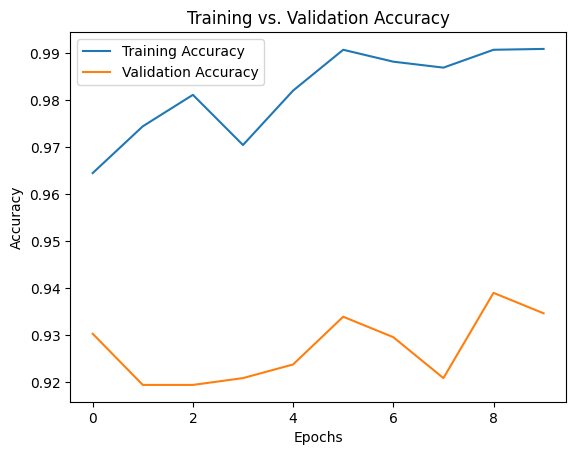

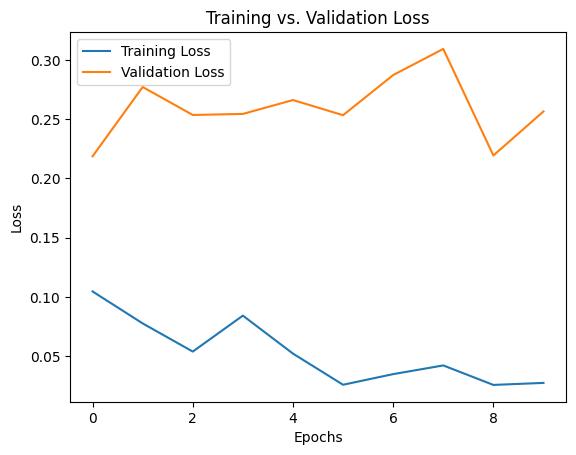

In [37]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()